http://blog.yhat.com/posts/logistic-regression-and-python.html

In [59]:
# COLLAPSE CELL
# PMsearch np.v*
#x = data['mass']
#x?

# from jupyterthemes import jtplot
# jtplot.style(theme='solarized')
# from jupyterlab_table import JSONTable
# JSONTable(df)

from pprint import pprint
import math
import statsmodels.stats as sms
import statsmodels.api as sm
import statsmodels.regression as smr
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


# 04atplotlib inline
# %load_ext heat

plt.ion()
# plt.ioff()

# %heat

import os 
# dir_path = os.path.dirname(os.path.realpath(__file__))
cwd = os.getcwd()

# fig, ax = plt.subplots()
# ax.plot(x, y)

In [60]:
df = pd.read_csv("data/grad.csv")
df.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [61]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [62]:
df_index = df.index.tolist()
# pd.crosstab(df_index, df)




In [63]:
crosstab = pd.crosstab(df['admit'], df['rank'])
crosstab

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


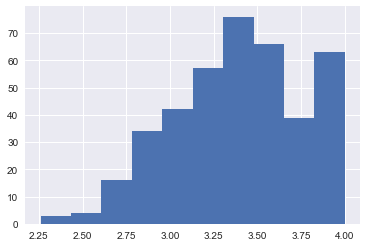

In [64]:
df['gpa'].hist()

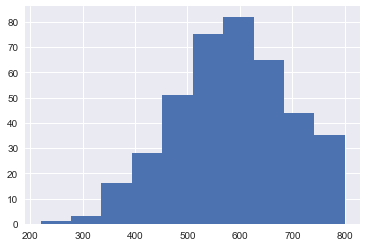

In [65]:
df['gre'].hist()

In [66]:
df['admit'].mean()

0.3175

In [67]:
df['admit'].count()

400

In [68]:
df['admit'].where(df['admit']==0).count()

273

In [35]:
df['admit'].where(df['admit']==1).count()

127

In [36]:
# list(df)

['admit', 'gre', 'gpa', 'rank']

NameError: name 'spector_data' is not defined

In [78]:
dummy_ranks = pd.get_dummies(df['rank'], prefix='rank')

In [79]:
# dummy_ranks = df.join(dummy_ranks.ix[:, 'prestige_2':])

In [80]:
dummy_ranks

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,1,0,0


In [81]:
logit_df = df.join(dummy_ranks)

In [86]:
logit_df['intercept'] = 1


In [92]:
# remove rank
logit_df = logit_df[['admit','gre', 'gpa', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'intercept']]




In [97]:
import statsmodels.discrete.discrete_model as dm

df_y = logit_df['admit']
df_x = logit_df[['gre', 'gpa', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'intercept']]

model = dm.Logit(df_y, df_x)

model.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [98]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)